In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Check for missing values

missing_values=df.isnull().sum().sort_values(ascending=False)
missing_values=missing_values[missing_values>0]/df.shape[0] #normalizing
print(f'{missing_values * 100} %')

#This implies that there are no missing values

Series([], dtype: float64) %


In [3]:
from sklearn.preprocessing import LabelEncoder

st=df.apply(LabelEncoder().fit_transform)

st.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


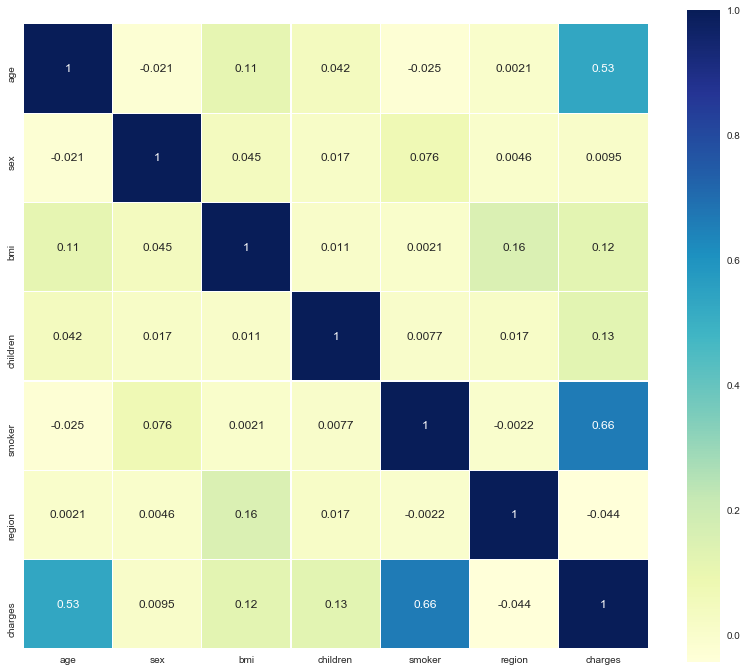

In [4]:
#Visualizing the correlation heatmap

sns.set(color_codes=True)
plt.figure(figsize=(14,12))
sns.heatmap(st.astype(float).corr(),
           linewidths=0.2,
           square=True,
           linecolor='white',
           annot=True,
           cmap='YlGnBu')
plt.show()

C:\Users\Rishan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


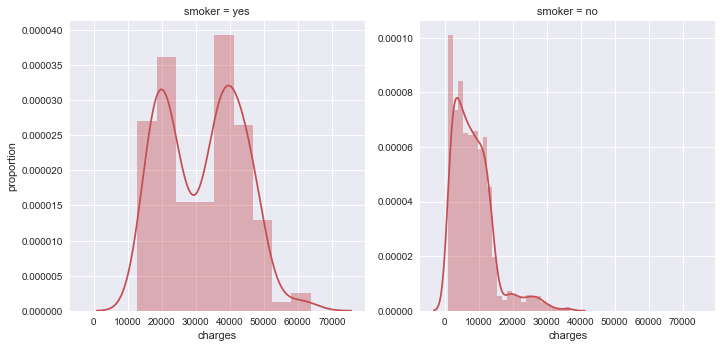

In [5]:
#From the above, we can see that age and smoking weigh the most when looking at the charges row. These two
#weights are higher than the rest

g=sns.FacetGrid(df,col='smoker',size=5,sharey=False,sharex=True)
g.map(sns.distplot,'charges',color='r')
g.set_axis_labels('charges','proportion')
g.despine(left=True)

C:\Users\Rishan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


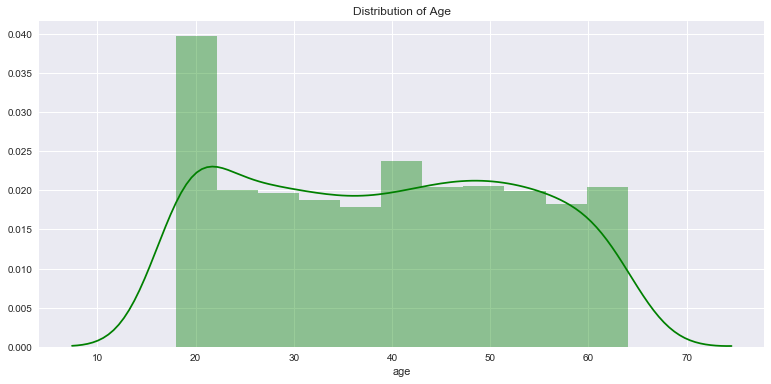

In [6]:
#From the above graphs, it is obvious that smokers pay more for healthcare

plt.figure(figsize=(13,6))
plt.title('Distribution of Age')
ax=sns.distplot(df['age'],color='green')

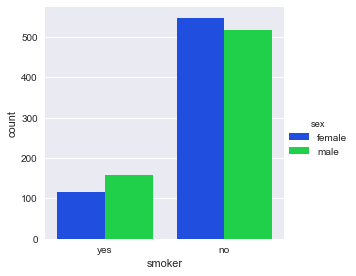

In [7]:
sns.factorplot(x="smoker", kind="count", hue = 'sex', data = df , palette='bright');
plt.show()

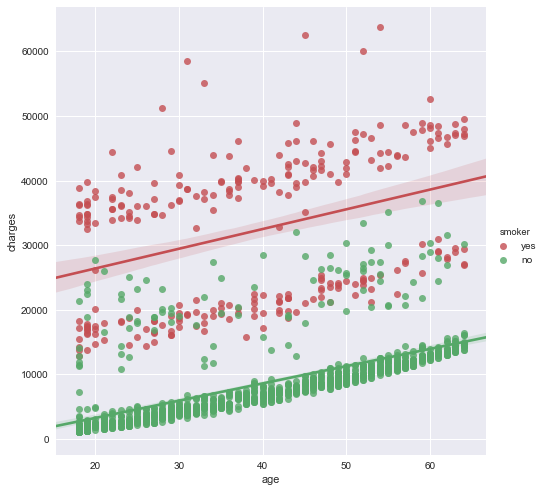

In [8]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette=dict(yes="r", no="g"), size = 7);
ax.set_title('Smokers and non-smokers');
plt.show()

In [9]:
#charges increase linearly with age, smoking appears to be the highest contributor to charges.

df['age'] = df['age'].astype(float)
df['children'] = df['children'].astype(float)

df = pd.get_dummies(df)

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
y = df['charges']
X = df.drop(columns=['charges'])

In [11]:
#Since no testing data is provided, we'll split the given dataset into training and testing sets.

from sklearn.model_selection import train_test_split

#use 10% of dataset as testing data

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression().fit(x_train,y_train)

lr_train_pred=lr.predict(x_train)
lr_test_pred=lr.predict(x_test)

lr_train_mse=mean_squared_error(y_train,lr_train_pred)
lr_test_mse=mean_squared_error(y_test,lr_test_pred)

print("MSE Train data: {:.5},MSE Test Data: {:.5}".format(lr_train_mse,lr_test_mse))

print("RMSE Train Data: {:.5}, RMSE Test Data: {:.5}".format(
np.sqrt(np.absolute(lr_train_mse)),
np.sqrt(np.absolute(lr_test_mse))))

print('R2 Train Data: {:.5}, R2 Test Data: {:.5}'.format(
r2_score(y_train,lr_train_pred),
r2_score(y_test,lr_test_pred)))

MSE Train data: 3.6994e+07,MSE Test Data: 3.2276e+07
RMSE Train Data: 6082.3, RMSE Test Data: 5681.2
R2 Train Data: 0.74915, R2 Test Data: 0.76604


In [13]:
#Cross Validation

from sklearn.model_selection import cross_val_score
lr_cv=cross_val_score(LinearRegression(),X,y,cv=7)

#accuracy +/- 2 Standard deviations

print("Accuracy: {:.2} (+/- {:.2})".format(lr_cv.mean(),lr_cv.std()*2))

Accuracy: 0.74 (+/- 0.079)


This isn't too bad for a first try. Now we try implementing Polynomial Features.

Polynomial features works on adding a matrix of polynomial coefficients of up to the  kthkth  order, generated by non-linear relationships of current features.

For the case of  k=2k=2  it looks something like this:

A⋅(x1+x2+..+xn)2=a1x21+a2x1x2+a3x22+a4x2x3+..
A⋅(x1+x2+..+xn)2=a1x12+a2x1x2+a3x22+a4x2x3+..
 
Where  aiai  represents the coefficient for Linear Regression to manipulate.

This helps us see the effect of non-linear relationships between features.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

X_poly=PolynomialFeatures(degree=2).fit_transform(X)

x_train,x_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.1,random_state=42)

In [16]:
pr=LinearRegression().fit(x_train,y_train)

pr_train_pred=pr.predict(x_train)
pr_test_pred=pr.predict(x_test)

pr_train_mse=mean_squared_error(y_train,pr_train_pred)
pr_test_mse=mean_squared_error(y_test,pr_test_pred)

print('MSE train data: {:.5}, MSE Test Data: {:.5}'.format(pr_train_mse,pr_test_mse))

print('RMSE Train Data: {:.5}, RMSE Test Data: {:.5}'.format(
np.sqrt(np.absolute(pr_train_mse)),
np.sqrt(np.absolute(pr_test_mse))))

print('R2 train data: {:.5}, R2 Test Data: {:.5}'.format(
r2_score(y_train,pr_train_pred),
r2_score(y_test,pr_test_pred)))

MSE train data: 2.2632e+07, MSE Test Data: 2.0052e+07
RMSE Train Data: 4757.3, RMSE Test Data: 4477.9
R2 train data: 0.84654, R2 Test Data: 0.85465


In [17]:
pr_cv=cross_val_score(LinearRegression(),X_poly,y,cv=7)
#Accuracy +/-2 Standard Deviations

print("Accuracy: {:.2} (+/- {:.2})".format(pr_cv.mean(),pr_cv.std()*2))

Accuracy: 0.76 (+/- 0.19)


Now we have a better variance score using polynomial relationships.

## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor().fit(x_train,y_train)

dtr_train_pred = rfr.predict(x_train)
dtr_test_pred = rfr.predict(x_test)


dtr_train_mse = mean_squared_error(y_train,dtr_train_pred)
dtr_test_mse = mean_squared_error(y_test,dtr_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(dtr_train_mse, dtr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(dtr_train_mse)), 
    np.sqrt(np.absolute(dtr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, dtr_train_pred),
    r2_score(y_test, dtr_test_pred)))

MSE train data: 2.1706e+05, MSE test data: 4.0802e+07
RMSE train data: 465.89, RMSE test data: 465.89
R2 train data: 0.99853, R2 test data: 0.70424


In [61]:
dtr_cv = cross_val_score(DecisionTreeRegressor(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(dtr_cv.mean(), dtr_cv.std() * 2)) 

Accuracy: 0.67 (+/- 0.12)


In [57]:


#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
max_depth = list(range(1,50))
max_leaf_nodes = list(range(2,30))
#p=[1,2]
#Convert to dictionary
hyperparameters = dict(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
#Create new KNN object
dtr_2 = DecisionTreeRegressor()
#Use GridSearch
clf = GridSearchCV(dtr_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train, y_train)
#Print The value of best Hyperparameters
print('Max Depth:', best_model.best_estimator_.get_params()['max_depth'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Max Leaf Nodes:', best_model.best_estimator_.get_params()['max_leaf_nodes'])

Max Depth: 3
Max Leaf Nodes: 9


In [62]:
dtr_cv = cross_val_score(DecisionTreeRegressor(max_depth=3,max_leaf_nodes=9), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(dtr_cv.mean(), dtr_cv.std() * 2)) 

Accuracy: 0.84 (+/- 0.08)


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=50).fit(x_train,y_train)

rfr_train_pred = rfr.predict(x_train)
rfr_test_pred = rfr.predict(x_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(rfr_train_mse, rfr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 3.7578e+06, MSE test data: 2.1988e+07
RMSE train data: 1938.5, RMSE test data: 1938.5
R2 train data: 0.97452, R2 test data: 0.84062


In [53]:
rfr_cv = cross_val_score(RandomForestRegressor(n_estimators = 50), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(rfr_cv.mean(), rfr_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.095)


## Bayesian Ridge

In [22]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge().fit(x_train, y_train)

br_train_pred = br.predict(x_train)
br_test_pred = br.predict(x_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(br_train_mse, br_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))

MSE train data: 2.453e+07, MSE test data: 2.0244e+07
RMSE train data: 4952.8, RMSE test data: 4952.8
R2 train data: 0.83366, R2 test data: 0.85326


In [23]:
br_cv = cross_val_score(BayesianRidge(), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(br_cv.mean(), br_cv.std() * 2)) 

Accuracy: 0.83 (+/- 0.069)


## KNN Regressor 

In [27]:
br = KNeighborsRegressor().fit(x_train, y_train)
br

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [35]:
from sklearn.neighbors import KNeighborsRegressor

br = KNeighborsRegressor(n_neighbors=3).fit(x_train, y_train)

br_train_pred = br.predict(x_train)
br_test_pred = br.predict(x_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(br_train_mse, br_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))


MSE train data: 6.0127e+07, MSE test data: 1.0008e+08
RMSE train data: 7754.2, RMSE test data: 7754.2
R2 train data: 0.59228, R2 test data: 0.27452


In [41]:
km_cv = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(km_cv.mean(), km_cv.std() * 2)) 

Accuracy: 0.14 (+/- 0.081)


In [44]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 8


In [45]:
from sklearn.neighbors import KNeighborsRegressor

br = KNeighborsRegressor(leaf_size=1,p=1,n_neighbors=8).fit(x_train, y_train)

br_train_pred = br.predict(x_train)
br_test_pred = br.predict(x_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(br_train_mse, br_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))


MSE train data: 6.0939e+07, MSE test data: 5.8757e+07
RMSE train data: 7806.4, RMSE test data: 7806.4
R2 train data: 0.58678, R2 test data: 0.57409


In [46]:
km_cv = cross_val_score(KNeighborsRegressor(leaf_size=1,p=1,n_neighbors=8), X_poly, y, cv = 7)
# accuracy +/- 2 standard deviations
print("Accuracy: {:.2} (+/- {:.2})".format(km_cv.mean(), km_cv.std() * 2)) 

#Low accuracy.

Accuracy: 0.45 (+/- 0.084)
